# MEMO Tutorial on the Qemistree Evaluation Dataset

In this tutorial, we will use the Qemistree published dataset (https://doi.org/10.1038/s41589-020-00677-3) to apply the MS2 BasEd SaMple VectOrization (MEMO) method

The dataset is constitued of 2 fecal samples, 1 tomato sample and 1 plasma sample, plus different binary/quaternary mixtures of these four samples. Samples were profiled in UHPLC-MS/MS (Q-Exactive spectrometer) using 2 different LC-methods. Each sample was acquired in triplicates using each LC-method (see Qemistree paper for details).

## First we import the needed packages
Be sure to have first installed memo using 'pip install memo' within the memo environment. 
Also make sure to launch this notebook using the memo conda environement.

In [1]:
import pandas as pd
import numpy as np
import memo_ms as memo
import plotly.express as px

C:\Users\gaudrya.FARMA\Anaconda3\envs\memo\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
# this cell is tagged 'parameters'
fake_parameter = 'foo'

With this step we import metadata:

In [2]:

def conditions(df_meta):
    if ((df_meta['Proportion_Fecal_1']>0) & (df_meta['Proportion_Fecal_2']==0)& (df_meta['Proportion_Tomato']==0) & (df_meta['Proportion_NIST_1950_SRM']==0)):
        return 'Fecal_1'
    if ((df_meta['Proportion_Fecal_1']==0) & (df_meta['Proportion_Fecal_2']>0)& (df_meta['Proportion_Tomato']==0) & (df_meta['Proportion_NIST_1950_SRM']==0)):
        return 'Fecal_2'
    if ((df_meta['Proportion_Fecal_1']==0) & (df_meta['Proportion_Fecal_2']==0)& (df_meta['Proportion_Tomato']>0) & (df_meta['Proportion_NIST_1950_SRM']==0)):
        return 'Tomato'
    if ((df_meta['Proportion_Fecal_1']==0) & (df_meta['Proportion_Fecal_2']==0)& (df_meta['Proportion_Tomato']==0) & (df_meta['Proportion_NIST_1950_SRM']>0)):
        return 'Plasma'
    if ((df_meta['Proportion_Fecal_1']>0) & (df_meta['Proportion_Fecal_2']>0)& (df_meta['Proportion_Tomato']==0) & (df_meta['Proportion_NIST_1950_SRM']==0)):
        return 'Fecal_1 + Fecal_2'
    if ((df_meta['Proportion_Fecal_1']>0) & (df_meta['Proportion_Fecal_2']==0)& (df_meta['Proportion_Tomato']>0) & (df_meta['Proportion_NIST_1950_SRM']==0)):
        return 'Fecal_1 + Tomato'
    if ((df_meta['Proportion_Fecal_1']>0) & (df_meta['Proportion_Fecal_2']==0)& (df_meta['Proportion_Tomato']==0) & (df_meta['Proportion_NIST_1950_SRM']>0)):
        return 'Fecal_1 + Plasma'
    if ((df_meta['Proportion_Fecal_1']==0) & (df_meta['Proportion_Fecal_2']>0)& (df_meta['Proportion_Tomato']>0) & (df_meta['Proportion_NIST_1950_SRM']==0)):
        return 'Fecal_2 + Tomato'
    if ((df_meta['Proportion_Fecal_1']==0) & (df_meta['Proportion_Fecal_2']>0)& (df_meta['Proportion_Tomato']==0) & (df_meta['Proportion_NIST_1950_SRM']>0)):
        return 'Fecal_2 + Plasma'
    if ((df_meta['Proportion_Fecal_1']==0) & (df_meta['Proportion_Fecal_2']==0)& (df_meta['Proportion_Tomato']>0) & (df_meta['Proportion_NIST_1950_SRM']>0)):
        return 'Tomato + Plasma'
    if ((df_meta['Proportion_Fecal_1']>0) & (df_meta['Proportion_Fecal_2']>0)& (df_meta['Proportion_Tomato']>0) & (df_meta['Proportion_NIST_1950_SRM']>0)):
        return 'Fecal_1 + Fecal_2 + Tomato + Plasma' 
    else:
        return 'What is it? :)'


df_meta = pd.read_csv("data/1901_gradient_benchmarking_dataset_v4_sample_metadata.txt", sep='\t')
df_meta['Samplename'] = df_meta['Samplename'].str[:-6]
df_meta['Samplename'] = df_meta['Samplename'].str.replace('BLANK_', 'BLANK')
df_meta = df_meta[['Filename', 'Experiment', 'Samplename', 'Triplicate_number', 'Proportion_Fecal_1', 'Proportion_Fecal_2', 'Proportion_Tomato', 'Proportion_NIST_1950_SRM']]
df_meta['contains'] = df_meta.apply(conditions, axis=1)
df_meta['instrument'] = np.where(df_meta['Samplename'].str.contains('qTOF'), 'qTOF', 'QE')
df_meta['blank_qc'] = np.where(df_meta['Samplename'].str.contains('blank|qcmix', case = False), 'yes', 'no')
df_meta


,Filename,Experiment,Samplename,Triplicate_number,Proportion_Fecal_1,Proportion_Fecal_2,Proportion_Tomato,Proportion_NIST_1950_SRM,contains,instrument,blank_qc
0,QEC18_Blank_resusp_20181226235330.mzML,C18,QE_C18_BLANK,1,0,0,0,0,What is it? :),QE,yes
1,QEC18_Blank_resusp_20181227024429.mzML,C18,QE_C18_BLANK,2,0,0,0,0,What is it? :),QE,yes
2,QEC18_Blank_resusp_20181227051626.mzML,C18,QE_C18_BLANK,3,0,0,0,0,What is it? :),QE,yes
3,QEC18_Blank_resusp_20181227072924.mzML,C18,QE_C18_BLANK,4,0,0,0,0,What is it? :),QE,yes
4,QEC18_Blank_resusp_20181227100129.mzML,C18,QE_C18_BLANK,5,0,0,0,0,What is it? :),QE,yes
...,...,...,...,...,...,...,...,...,...,...,...
565,C18_F1-3_To-1_GC5_01_19577.mzML,C18-RTshift,qTOF_C18-RTshift_F1-3_To-1,2,75,0,25,0,Fecal_1 + Tomato,qTOF,no
566,C18_F1-3_To-1_GC5_01_19584.mzML,C18-RTshift,qTOF_C18-RTshift_F1-3_To-1,3,75,0,25,0,Fecal_1 + Tomato,qTOF,no
567,C18_F1-3_F2-1_GB4_01_19512.mzML,C18-RTshift,qTOF_C18-RTshift_F1-3_F2-1,1,75,25,0,0,Fecal_1 + Fecal_2,qTOF,no
568,C18_F1-3_F2-1_GB4_01_19547.mzML,C18-RTshift,qTOF_C18-RTshift_F1-3_F2-1,2,75,25,0,0,Fecal_1 + Fecal_2,qTOF,no


## Import feature_quant table
To compute the MEMO matrix of the dataset, we need the table reporting presence/absence of each metabolite in each sample. This information is in the quant table and we create a memo.FeatureTable dataclass object to load it.

In [3]:
feat_table_qe = memo.FeatureTable(path="data/quantification_table-00000.csv")
feat_table_qe.quant_table

row ID,1,2,3,4,5,6,7,8,9,10,...,7023,7024,7025,7026,7027,7028,7029,7030,7031,7032
filename,,,,,,,,,,,,,,,,,,,,,
QEC18_Blank_resusp_20181227024429.mzML,8.739521e+08,1.481579e+08,9.837010e+07,8.224197e+07,7.315887e+07,7.114766e+07,1.555986e+08,1.176479e+08,4.639512e+07,1.054225e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.638457e+03,0.000000e+00,0.000000e+00
QEC18_Blank_resusp_20181227200515.mzML,1.205125e+09,3.421555e+08,2.866821e+07,8.136892e+07,7.267058e+07,1.397751e+08,1.432423e+08,3.201985e+07,1.318607e+08,1.307877e+04,...,1.403758e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.869926e+03,0.000000e+00,0.000000e+00
QEC18_Blank_resusp_20181227180406.mzML,8.856410e+08,2.189828e+08,1.133203e+08,1.442344e+08,2.595832e+08,1.260566e+08,1.637546e+08,6.510952e+07,9.251141e+07,5.368852e+07,...,5.255234e+02,0.000000e+00,2.501361e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.820253e+03,0.000000e+00,0.000000e+00
QEC18_Blank_resusp_20181227100129.mzML,1.672233e+09,3.215060e+08,2.621886e+08,2.304763e+08,0.000000e+00,1.504232e+08,1.600571e+08,1.044643e+08,1.385671e+08,5.633343e+03,...,0.000000e+00,0.000000e+00,1.025391e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.094878e+03,0.000000e+00,0.000000e+00
QEC18_Blank_resusp_20181226235330.mzML,3.730564e+08,1.466751e+08,4.948088e+07,0.000000e+00,2.946699e+08,4.121042e+07,1.494343e+08,1.815754e+08,2.512913e+07,4.915055e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.407866e+03,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QEC18RT_F1.mzML,2.651802e+05,5.065530e+05,0.000000e+00,4.924721e+05,2.399147e+05,0.000000e+00,1.089271e+06,2.190487e+04,1.182916e+05,1.174440e+08,...,2.796922e+06,3.081157e+07,2.221418e+07,1.504250e+07,6.198181e+06,4.512574e+06,1.276397e+07,8.826358e+06,3.281628e+06,2.809365e+07
QEC18RT_F1_20181229114729.mzML,5.304884e+05,2.502201e+05,0.000000e+00,8.183989e+03,8.817621e+05,0.000000e+00,2.379306e+06,1.395917e+05,1.935925e+05,1.171058e+08,...,1.961899e+06,3.297185e+07,0.000000e+00,1.277410e+07,1.953058e+05,6.209425e+05,6.744892e+06,6.012722e+06,7.457704e+05,9.571486e+05
QEC18RT_F2_20181229083715.mzML,4.728289e+05,1.238884e+05,0.000000e+00,4.191255e+04,1.300201e+05,1.692591e+03,1.445742e+06,6.468152e+04,1.403810e+05,8.159880e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.256565e+07,4.468508e+06,0.000000e+00,9.674889e+06,0.000000e+00,0.000000e+00


## Import spectra
Since MEMO relies on the occurence of MS2 fragments/losses in samples to compare them, we obviously need to importthe features' fragmentation spectra. Losses are computed and spectra translated into documents. Store in memo.SpectraDocuments dataclass object.

In [4]:
spectra_qe = memo.SpectraDocuments(path="data/qemistree_specs_ms.mgf", min_relative_intensity = 0.01,
            max_relative_intensity = 1, min_peaks_required=5, losses_from = 10, losses_to = 200, n_decimals = 2)
spectra_qe.document

,scans,pepmass,charge,collision_energy,precursor_mz,documents
0,1,"(338.342, None)",[1+],0.0,338.3420,"[peak@71.05, peak@71.09, peak@72.08, peak@78.7..."
1,2,"(278.1905, None)",[1+],0.0,278.1905,"[peak@84.08, peak@91.05, peak@105.07, peak@115..."
2,3,"(702.2131, None)",[1+],0.0,702.2131,"[peak@73.05, peak@79.02, peak@80.97, peak@81.0..."
3,4,"(663.452, None)",[1+],0.0,663.4520,"[peak@91.05, peak@147.12, peak@251.05, peak@30..."
4,5,"(663.4555, None)",[1+],0.0,663.4555,"[peak@91.05, peak@147.12, peak@251.05, peak@30..."
...,...,...,...,...,...,...
6564,7028,"(381.3165, None)",[1+],0.0,381.3165,"[peak@70.07, peak@71.05, peak@71.09, peak@72.3..."
6565,7029,"(453.3377, None)",[1+],0.0,453.3377,"[peak@71.05, peak@79.05, peak@81.03, peak@81.0..."
6566,7030,"(165.0911, None)",[1+],0.0,165.0911,"[peak@81.07, peak@83.05, peak@91.05, peak@95.0..."
6567,7031,"(501.3573, None)",[1+],0.0,501.3573,"[peak@81.07, peak@95.09, peak@105.07, peak@198..."


## Generation of MEMO matrix

Using the generated documents and the quant table, we can now obtain the MEMO matrix. The MEMO matrix is stored in the MemoContainer object, along with the feature table and the documents

In [7]:
memo_qe = memo.MemoContainer()
memo_qe.memo_from_aligned_samples(feat_table_qe, spectra_qe)
memo_qe.memo_matrix

generating memo_matrix from input featuretable and spectradocument


100%|██████████| 198/198 [00:06<00:00, 30.58it/s]


MemoContainer()

In [31]:
memo_qe.filter_matrix(matrix_to_use='memo_matrix', samples_pattern='blank', max_occurence=100)
memo_qe.filter_matrix(matrix_to_use='feature_matrix', samples_pattern='blank', max_occurence=100)
memo_qe.filtered_memo_matrix

,peak@71.05,peak@71.09,peak@72.08,peak@78.74,peak@79.05,peak@81.07,peak@83.09,peak@85.10,peak@86.06,peak@86.10,...,peak@604.26,peak@620.26,peak@679.27,peak@131.23,peak@138.34,peak@177.88,peak@235.22,peak@262.41,peak@345.96,peak@444.82
filename,,,,,,,,,,,,,,,,,,,,,
QEC18_F1-1_F2-1.mzML,899.0,1620.0,111.0,2.0,2559.0,3467.0,2717.0,1047.0,76.0,561.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QEC18_F1-1_NIST-3.mzML,878.0,1610.0,107.0,2.0,2511.0,3429.0,2669.0,1036.0,75.0,552.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QEC18_F1-1_F2-1_20181227143118.mzML,903.0,1656.0,117.0,1.0,2605.0,3576.0,2764.0,1058.0,73.0,605.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QEC18_F1-1_F2-1_20181227084526.mzML,919.0,1680.0,113.0,3.0,2660.0,3636.0,2816.0,1071.0,74.0,582.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QEC18_F1-1_F2-1_NIST-2_To-1.mzML,1006.0,1718.0,114.0,3.0,2996.0,4011.0,2984.0,1096.0,72.0,651.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QEC18RT_F1.mzML,954.0,1713.0,122.0,1.0,2700.0,3649.0,2855.0,1101.0,72.0,558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QEC18RT_F1_20181229114729.mzML,961.0,1711.0,118.0,2.0,2706.0,3659.0,2869.0,1088.0,72.0,594.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QEC18RT_F2_20181229083715.mzML,861.0,1626.0,118.0,1.0,2544.0,3482.0,2728.0,1039.0,73.0,571.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plotting

We can now use the MEMO matrix to generate the PCoA of our samples

In [35]:

memo.plot_pcoa_2d(
    matrix= memo_qe.filtered_memo_matrix,
    df_metadata=df_meta,
    metric= 'braycurtis',
    filename_col = 'Filename',
    group_col='contains',
    norm = False,
    scaling= False,
    pc_to_plot = [1,2]
)

c:\users\gaudrya.farma\anaconda3\lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:143: RuntimeWarning:

The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.01928569117614736 and the largest is 0.514687405068449.



In [33]:
memo.plot_pcoa_3d(
    matrix= memo_qe.filtered_memo_matrix,
    df_metadata=df_meta,
    metric= 'braycurtis',
    filename_col = 'Filename',
    group_col='contains',
    norm = False,
    scaling= False,
    pc_to_plot = [1,2,3]
)

c:\users\gaudrya.farma\anaconda3\lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:143: RuntimeWarning:

The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.01928569117614736 and the largest is 0.514687405068449.



In [39]:
df_meta_sub = df_meta[df_meta['Triplicate_number'] == 1]

memo.plot_heatmap(
    matrix= memo_qe.filtered_memo_matrix,
    df_metadata=df_meta_sub,
    filename_col = 'Filename',
    group_col = 'contains',
    plotly_discrete_cm = px.colors.qualitative.Plotly,
    linkage_method='ward',
    linkage_metric = 'euclidean',
    heatmap_metric = 'braycurtis',
    norm = False,
    scaling= False
)

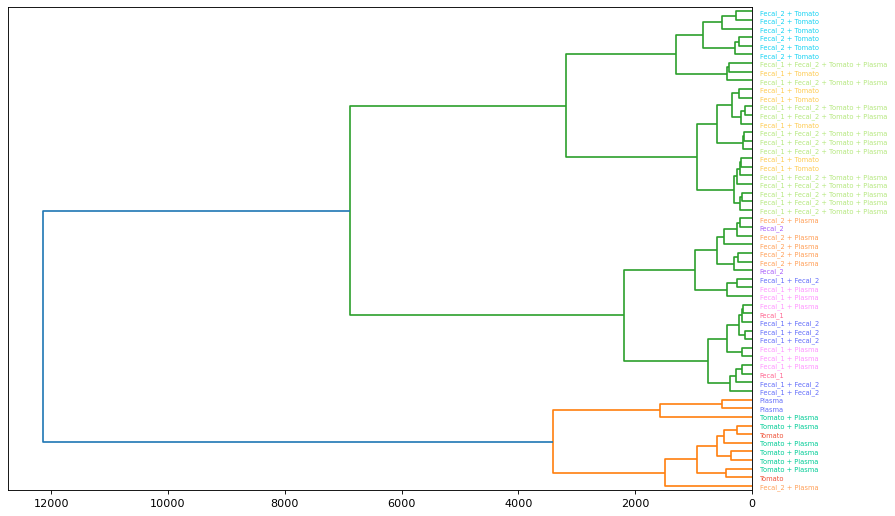

In [41]:
memo.plot_hca(
    matrix= memo_qe.filtered_memo_matrix,
    df_metadata=df_meta_sub,
    filename_col = 'Filename',
    group_col = 'contains',
    linkage_method='ward',
    linkage_metric = 'euclidean',
    norm = False,
    scaling= False
)

## Merge MEMO matrix from different MzMine projects

First, we load as before the spectra and feature matrix to generate the memo matrix of the different projects to merge.

In this case, we will once again use the Qemistree dataset and compare for the same samples data aquired on a QToF with some on a Q-Exactive (Orbitrap).

In [60]:
# Generate MEMO matrix for QE data

feat_table_qe = memo.FeatureTable(path="data/qe_qtof_coanalysis/qe_quant_nogapF.csv")
spectra_qe = memo.SpectraDocuments(path="data/qe_qtof_coanalysis/qe_spectra_nogapF.mgf", min_relative_intensity = 0.01,
            max_relative_intensity = 1, min_peaks_required=5, losses_from = 10, losses_to = 200, n_decimals = 2)
memo_qe = memo.MemoContainer()
memo_qe.memo_from_aligned_samples(feat_table_qe, spectra_qe)

  0%|          | 0/99 [00:00<?, ?it/s]

generating memo_matrix from input featuretable and spectradocument


100%|██████████| 99/99 [00:00<00:00, 107.57it/s]


In [61]:
# Generate MEMO matrix for QToF data

feat_table_qtof = memo.FeatureTable(path="data/qe_qtof_coanalysis/qtof_quant_nogapF.csv")
spectra_qtof = memo.SpectraDocuments(path="data/qe_qtof_coanalysis/qtof_spectra_nogapF.mgf", min_relative_intensity = 0.01,
            max_relative_intensity = 1, min_peaks_required=5, losses_from = 10, losses_to = 200, n_decimals = 2)
memo_qtof = memo.MemoContainer()
memo_qtof.memo_from_aligned_samples(feat_table_qtof, spectra_qtof)

 28%|██▊       | 27/97 [00:00<00:00, 261.96it/s]

generating memo_matrix from input featuretable and spectradocument


100%|██████████| 97/97 [00:00<00:00, 224.47it/s]


In [62]:
memo_qe.filter_matrix(matrix_to_use='memo_matrix', samples_pattern='blank', max_occurence=100)
memo_qtof.filter_matrix(matrix_to_use='memo_matrix', samples_pattern='blank', max_occurence=100)

Now, let's merge our 2 MEMO matrix. There is one paramater, drop_not_in_common, to decide wether to keep only shared peaks/losses or all of them.

In [65]:
memo_merged = memo_qe.merge_memo(memo_qtof, left = 'filtered_memo_matrix', right= 'filtered_memo_matrix', drop_not_in_common=True)

PCoA plot of the first 2 components show that the main parameter to discriminate our samples is the Instrument

In [68]:

memo.plot_pcoa_2d(
    matrix= memo_merged.memo_matrix,
    df_metadata=df_meta,
    metric= 'braycurtis',
    filename_col = 'Filename',
    group_col='contains',
    norm = True,
    scaling= False,
    pc_to_plot = [1,2]
)

But when looking at component 2 and 3, we see that it is possible to cluster chemically related samples using this approach.

In [69]:

memo.plot_pcoa_2d(
    matrix= memo_merged.memo_matrix,
    df_metadata=df_meta,
    metric= 'braycurtis',
    filename_col = 'Filename',
    group_col='contains',
    norm = True,
    scaling= False,
    pc_to_plot = [2,3]
)